In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import re
import random

In [15]:
df = pd.read_csv("covid_analytics_clinical_data.csv")
for col in df.columns:
    arr = df[col].to_numpy()
    if isinstance(arr[df[col].first_valid_index()],str):
        if re.search('.*%$', arr[df[col].first_valid_index()]):
            df[col] = (df[col].str.strip('%').astype(float))
        else:
            df[col] = df[col].str.lower()
            arr = df[col].to_numpy()
            arr = pd.unique(arr)
            classifier = np.array([i for i in range(len(arr))])
            df[col]=df[col].replace(arr,classifier)
df = df.fillna(-1)
df

,ID,SUB_ID,Country,Province/State,Study Pop Size (N),Proportion of values entered in row (%),Paper Title,Journal,Author,Source,...,Hypoproteinaemia,Acidosis,Hospital admission (%),ICU admission,Discharged (%),"ICU length of stay, days","Hospital length of stay, days",Days to Viral Clearance (Median),Mortality,Projected Mortality (accounting for patients not currently discharged)
0,1.0,0.0,0,0,191.0,60.11,0,0,0,0,...,11.52,8.90,1.0,0.26,0,0,0,20.0,0,0
1,1.0,1.0,0,0,54.0,60.11,0,0,0,0,...,37.04,29.63,1.0,0.72,1,0,1,7.5,1,1
2,1.0,2.0,0,0,137.0,60.11,0,0,0,0,...,1.46,0.73,1.0,0.08,2,1,2,20.0,2,2
3,2.0,0.0,0,0,199.0,44.94,1,1,1,1,...,-1.00,-1.00,1.0,-1.00,0,2,3,28.0,3,3
4,2.0,1.0,0,0,99.0,44.94,1,1,1,1,...,-1.00,-1.00,1.0,-1.00,3,3,4,28.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,202.0,2.0,2,56,99.0,23.60,175,40,88,202,...,-1.00,-1.00,1.0,0.32,71,0,28,-1.0,30,42
535,202.0,3.0,2,56,117.0,23.03,175,40,88,202,...,-1.00,-1.00,1.0,0.54,53,13,13,-1.0,24,57
536,202.0,4.0,2,56,247.0,25.84,175,40,88,202,...,-1.00,-1.00,1.0,0.39,47,0,28,-1.0,3,4
537,202.0,5.0,2,56,50.0,25.28,175,40,88,202,...,-1.00,-1.00,1.0,0.42,22,13,28,-1.0,38,25


In [16]:
sampled = df.sample(225)

[0.0082644  0.00782436 0.00421899 0.00875368 0.00713061 0.01336383
 0.00815172 0.00785802 0.00887445 0.00837674 0.00598836 0.00058503
 0.00733788 0.00222071 0.00758189 0.00824944 0.00626154 0.00731987
 0.0094968  0.00147735 0.01392727 0.01238106 0.0150782  0.0078336
 0.00772262 0.00797384 0.01190142 0.0143396  0.00898249 0.0062008
 0.01058976 0.01026704 0.00219134 0.00699409 0.00433156 0.00443165
 0.00442918 0.00322245 0.00388602 0.00714201 0.00621304 0.00390943
 0.0012283  0.00348463 0.00303188 0.00190818 0.00457163 0.0036653
 0.0033265  0.00466545 0.00514307 0.00332854 0.00180205 0.00305226
 0.01247879 0.00984721 0.00898515 0.0128832  0.00655889 0.00851314
 0.00810212 0.00648651 0.00782022 0.00696758 0.00919053 0.00428958
 0.0043854  0.00333817 0.00695355 0.00570919 0.00521809 0.00522386
 0.00611874 0.00543882 0.00162646 0.01042806 0.0062827  0.00328881
 0.00682899 0.00297128 0.00290385 0.00041453 0.00591471 0.00763322
 0.00509179 0.0048639  0.0134821  0.00693796 0.00614431 0.0052959

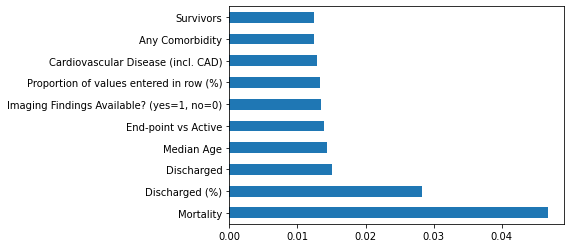

In [17]:

x = sampled.iloc[:, 0:161]
y = sampled.iloc[:, -1]
y = y.astype('int')

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [18]:
new_df = np.array(sampled[['Mortality','Discharged (%)','Survivors', 'End-point vs Active', 'Any Comorbidity']])

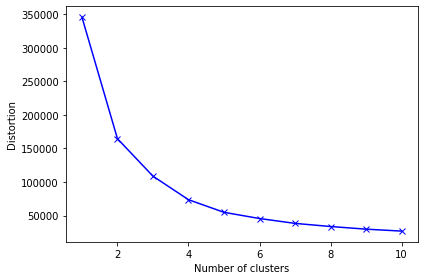

In [19]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i)
    km.fit(new_df)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()

plt.show()

In [20]:
km = KMeans(4)

km.fit(new_df)


KMeans(n_clusters=4)

In [21]:
x = np.nan_to_num(new_df)

In [22]:
#uses the pca algorithm to be able to easily plot the kmeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_components = pca.fit_transform(x)

labels = km.labels_

In [23]:
#
pca_df = pd.DataFrame(data = pca_components, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-18.006384,-16.077911
1,-18.021104,-15.124016
2,-19.952657,6.529392
3,-20.761319,29.418131
4,-10.345708,44.713653


In [24]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-18.006384,-16.077911,3
1,-18.021104,-15.124016,3
2,-19.952657,6.529392,3
3,-20.761319,29.418131,0
4,-10.345708,44.713653,0


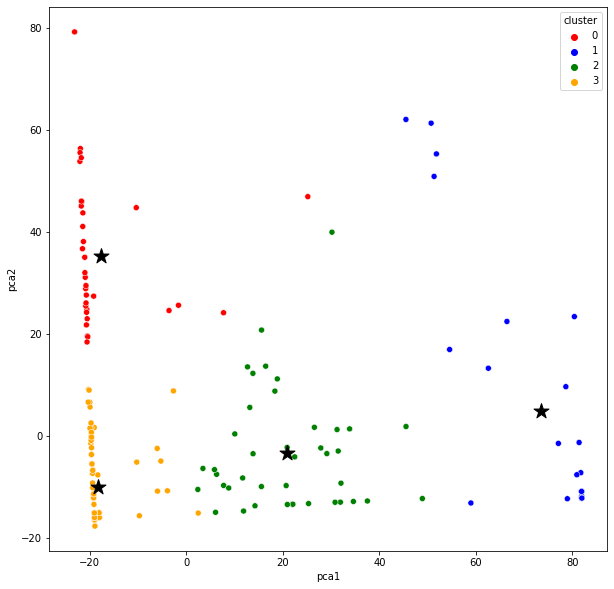

In [25]:
#Before 10 cross validation
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'blue', 'green','orange'])

centers_on_PCs = pca.transform(km.cluster_centers_)
plt.scatter(centers_on_PCs[:, 0], centers_on_PCs[:,1], s= 250, c = "k", marker="*")

In [26]:
#10-fold validation
print("Percentage of positives")
sampled['Projected Mortality (accounting for patients not currently discharged)'].value_counts()/len(sampled)

Percentage of positives


2     0.351111
7     0.342222
1     0.057778
18    0.017778
24    0.013333
11    0.013333
3     0.013333
16    0.008889
28    0.008889
15    0.008889
30    0.008889
9     0.008889
42    0.008889
6     0.008889
48    0.008889
5     0.008889
22    0.008889
10    0.004444
20    0.004444
13    0.004444
14    0.004444
4     0.004444
61    0.004444
21    0.004444
43    0.004444
58    0.004444
56    0.004444
53    0.004444
52    0.004444
49    0.004444
46    0.004444
39    0.004444
59    0.004444
38    0.004444
37    0.004444
36    0.004444
34    0.004444
29    0.004444
25    0.004444
0     0.004444
Name: Projected Mortality (accounting for patients not currently discharged), dtype: float64

In [27]:
#Set up data for train
x = new_df
y = np.array(sampled['Projected Mortality (accounting for patients not currently discharged)'])
y = y.astype('int')

In [28]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1)

cv=KFold(n_splits=10, shuffle=True, random_state=1)

predicted_score = cross_val_score(clf, x, y, cv=cv)


In [29]:
from numpy import mean, std
print('Accuracy: %.3f ( +/- %.3f)' % (mean(predicted_score), std(predicted_score)))

Accuracy: 0.538 ( +/- 0.085)


In [30]:
from sklearn.model_selection import cross_val_predict



predicted = cross_val_predict(clf, x, y, cv=cv)

predicted

array([ 2,  2,  7,  2,  2, 29,  2, 43,  1,  2,  2,  2,  7,  2,  7,  2,  2,
        2, 15,  2, 24, 24,  7,  2,  2,  7,  2,  2,  2, 46, 39,  2,  2,  2,
        2,  2,  2,  7,  2,  1,  2,  7,  7,  7, 18,  1,  2,  2,  2,  2, 30,
        7,  2,  1,  1, 16,  1,  7,  2,  2,  7,  2,  2,  2,  7, 30,  2, 28,
        2,  2, 22,  7,  2,  2,  2,  7, 38, 38,  2,  2,  7,  2,  2,  7, 29,
        2, 58, 30, 34,  1,  2,  2,  1,  2,  2,  2,  7,  2,  2,  7,  1,  2,
       39,  2,  1,  7,  2,  2,  7,  7,  2,  2,  2,  7,  7,  2,  2,  7, 30,
        2,  2,  7, 53,  7,  2,  7,  7,  2,  2,  2,  2,  7,  2,  7,  2,  2,
        2,  2,  2,  1,  7,  2, 43, 37,  2, 42,  2,  2,  2,  2,  7,  7,  7,
        7,  2, 42,  2,  2,  7,  2,  1,  2,  2,  2,  2,  2,  2,  2,  7,  2,
        7,  1,  2,  2,  2, 20,  2,  2,  2,  7, 18, 30, 24,  2,  7,  2,  2,
        2,  2,  2,  1,  2,  2,  2,  7,  2,  2,  2,  2,  7,  2,  2,  2,  1,
        2,  2,  2,  2,  2,  7,  1,  2,  7,  7,  2,  2,  7,  2,  2, 42,  2,
        2,  2,  1,  7])